<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_16_Matplotlib Advanced Customization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



## 🟩 Job Postings Trend for Cloud Engineers (2.16.1)

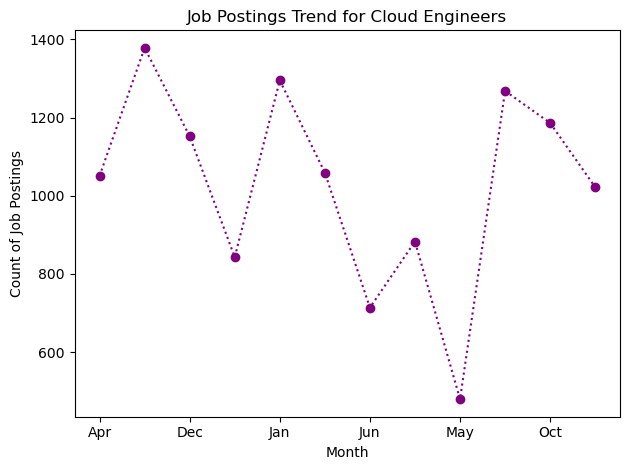

In [6]:
df_cloud_en = df[df['job_title_short'] == 'Cloud Engineer'].copy()


df_cloud_en['job_posted_month'] = df_cloud_en['job_posted_date'].dt.strftime('%b')

monthly_counts = df_cloud_en.groupby('job_posted_month').size()
monthly_counts.plot(
    kind='line',
    linestyle=':',     # dotted line
    color='purple',
    marker='o',         # circular marker
    title='Job Postings Trend for Cloud Engineers'
)

plt.ylabel('Count of Job Postings')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

---

## 🟨 Customize Bar Chart (2.16.2)

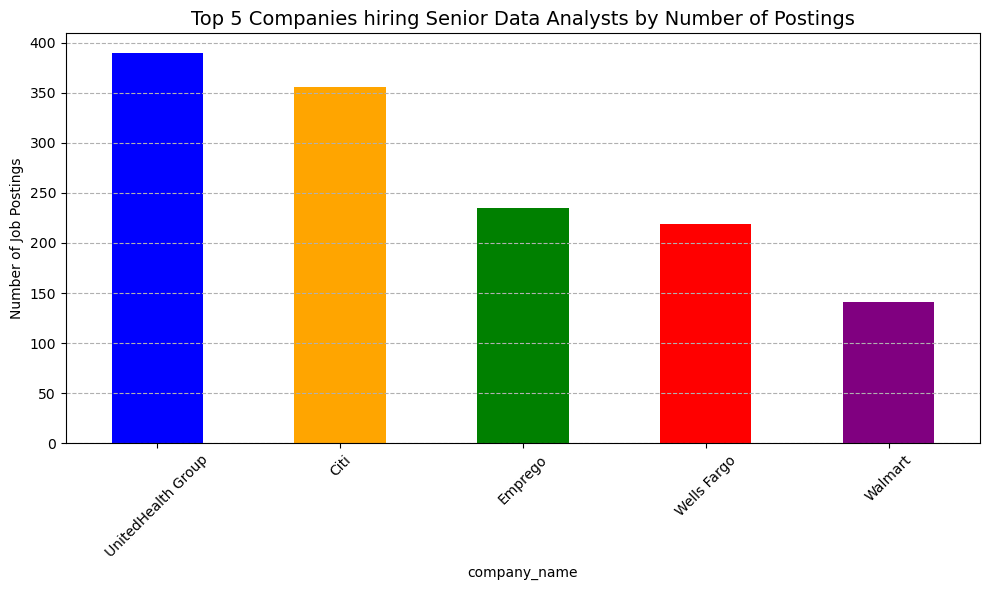

In [13]:
# Code Needed
colors = ['blue', 'orange', 'green', 'red', 'purple']

SDA_df = df[df['job_title_short'] == 'Senior Data Analyst']

top_companies = SDA_df['company_name'].value_counts().head(5)

plt.figure(figsize=(10,6))
top_companies.plot(
    kind= 'bar',
    color= colors,
)
# Step 5: Customize the plot
plt.grid(axis='y', linestyle='--')                   # Dashed gridlines only on y-axis
plt.xticks(rotation=45)                              # Rotate x-axis labels
plt.ylabel('Number of Job Postings')                 # Label y-axis
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)

# Step 6: Show the chart
plt.tight_layout()
plt.show()



---